# 데이터 전처리

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
from matplotlib import font_manager, rc
# 그래프를 바로 출력해주는 명령어
%matplotlib inline

In [ ]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [159]:
polygon_measure = pd.read_csv('measure.csv',encoding='cp949')
ddaa = pd.read_excel('statistics3.xlsx')

In [2]:
# feature 합치기()
ur = []
for x,y,z in zip(ddaa['초등학교'],ddaa['유치원'],ddaa['어린이집']):
    ur.append(x+y+z)
ddaa['초유어'] = ur
    
uh = []
for x,y in zip(ddaa['유흥업소'],ddaa['단란주점']):
    uh.append(x+y)    
ddaa['유흥단란'] = uh

ddaa.reset_index(inplace=True)
ddaa.rename(columns={'index':'법정동'},inplace=True)

NameError: name 'ddaa' is not defined

In [ ]:
# 폴리곤 단위 조절
polygon_measure['면적'] = polygon_measure['면적'] / 100000

# 교통사고 1년으로 조절
ddaa['교통사고']= ddaa['교통사고']/8 

# column 명 위치 조정
col = list(ddaa.columns)
cols = col[:-3] + col[-2:]
cols.append(col[-3])
ddaa = ddaa[cols]

# 제거할 컬럼 결정
ddaa.drop(columns=['아동성범죄자','119_안전센터','어린이보행자사고','스쿨존내교통사고','당구장','일반성범죄자','법정동','아동복지시설','초등학교','유치원','어린이집','유흥업소','단란주점'],inplace=True)


# 필요없는 값 빼기 (feature들의 합이 0인 row들 제거)
add = []
for i in range(len(ddaa)):
    if sum(ddaa.iloc[:,:-1].loc[i])==0:
        add.append(i)
        
ddaa.drop(add,inplace=True)
polygon_measure.drop( add, inplace=True)
ddaa.reset_index(drop=True,inplace=True)
polygon_measure.reset_index(drop=True,inplace=True)

# 교통사고가 0인 row들 제거
bbb = []
for i,j in enumerate(ddaa['교통사고']):
    if j==0:
        bbb.append(i)

ddaa.drop(bbb,inplace=True)
polygon_measure.drop(bbb,inplace=True)
ddaa.reset_index(drop=True,inplace=True)
polygon_measure.reset_index(drop=True,inplace=True)        

In [ ]:
ddaa1 = ddaa
polygon_measure1 = polygon_measure

In [ ]:
# feature들과 target 들을 면적으로 나누기(면적당 으로 바꾸기 위해)
for i in range(len(ddaa1)):
    ddaa1.loc[i] = ddaa1.loc[i] / polygon_measure['면적'].loc[i]

# target 값 분류

In [ ]:
def divide3(d):
    ii = []
    for i in ddaa1['교통사고']:
        if i>=0 and i<d:
            ii.append(1)
        elif i>=d and i<2*d:
            ii.append(2)
        elif i>=2*d:
            ii.append(3)
    return ii

def cou3(ii):    
    bar = [0,0,0]
    for i in ii:
        if i == 1:
            bar[0] += 1
        elif i == 2:
            bar[1] += 1
        elif i == 3:
            bar[2] += 1
    return bar

In [ ]:

# # d =( ddaa1['교통사고'].max() - ddaa1['교통사고'].min() ) / 5
# mi = ddaa1['교통사고'].min()
# ma = ddaa1['교통사고'].max()
def divide5(d):
    ii = []
    for i in ddaa1['교통사고']:
        if i>=0 and i<d:
            ii.append(1)
        elif i>=d and i<2*d:
            ii.append(2)
        elif i>=2*d and i<3*d:
            ii.append(3)
        elif i>=3*d and i<4*d:
            ii.append(4)
        elif i>=4*d:
            ii.append(5)
    return ii

def cou5(ii):    
    bar = [0,0,0,0,0]
    for i in ii:
        if i == 1:
            bar[0] = bar[0] + 1
        elif i == 2:
            bar[1] += 1
        elif i == 3:
            bar[2] += 1
        elif i == 4:
            bar[3] += 1
        elif i == 5:
            bar[4] += 1
    return bar

In [ ]:
cou3(divide3(3))

In [ ]:
sum(cou3(divide3(3)))

In [ ]:
ddaa2 = ddaa1.drop(columns='교통사고')
ddaa2['교통사고'] = shit

In [3]:
# 데이터 로드
ddaa2 = pd.read_csv('statistics_modified.csv',encoding='utf8')

# 모델

In [4]:
# one-hot encoding flask에 넣을 때 one-hot encoding하지 않으면 datatype 문제가 생김
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
ddaa2.iloc[:, -1] = lab_enc.fit_transform(ddaa2.iloc[:,-1])

In [5]:
# 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
# train_set 나누기
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)

## Decision Tree

In [14]:
dtc = DecisionTreeClassifier()

In [72]:
app = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)
    dtc.fit(X_train,y_train)
    app.append(dtc.score(X_test,y_test))
sum(app)/len(app)

0.8205918367347036

In [24]:
cross_val_score(dtc, ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],cv=10).mean()

0.8128230837789662

## Logistic Regression

In [76]:
logi1 = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [7]:
logi = LogisticRegression()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)

In [9]:
logi.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
logi.score(X_test,y_test)

0.8673469387755102

In [11]:
# 평균적인 Accuracy 구하기 # Logistic Regression
app = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)
    logi.fit(X_train,y_train)
    app.append(logi.score(X_test,y_test))
sum(app)/len(app)

0.8795918367346939

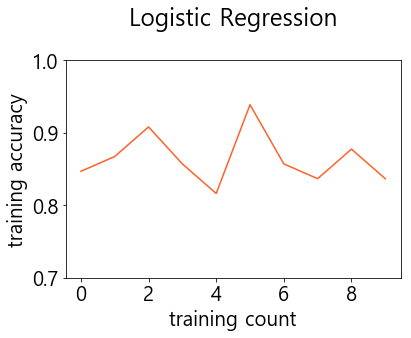

In [125]:
plt.plot(range(10), app, label="training accuracy",color='#FF6028')
# plt.scatter(range(10), app, label="training accuracy",color='#FF6028')
plt.xlabel("training count")
plt.ylabel("training accuracy")
plt.rcParams.update({'font.size': 20})
plt.title('Logistic Regression\n')
plt.ylim(0.7,1.)
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(logi, ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],cv=10).mean()

0.8829266934046345

In [13]:
from sklearn.model_selection import learning_curve

In [40]:
train_size, train_score, test_score = learning_curve(logi, X_train, y_train, cv=10)
# train_score, test_score = validation_curve(logi, X_train, y_train, cv=10, param_name='n_neighbors', param_range=range(1,5))

In [14]:
from sklearn_evaluation import plot

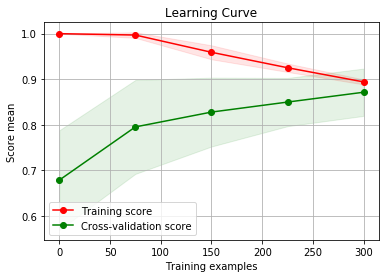

In [41]:
plot.learning_curve(train_score, test_score,train_sizes=np.linspace(0, 300, 5))

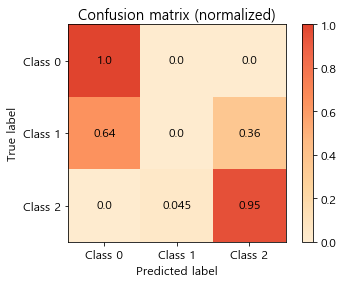

In [144]:
plt.rcParams.update({'font.size': 12})
plot.confusion_matrix(y_test, logi.predict(X_test),normalize=True)

설명... 우리 서비스는 ~이기 때문에 precision or recall 이 높은 것이 취지에 맞다.

In [29]:
from sklearn.model_selection import learning_curve, validation_curve

In [35]:
logi.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, logi.predict(X_test), target_names=['안전','주의','위험']))

             precision    recall  f1-score   support

         안전       0.91      0.96      0.93        72
         주의       0.00      0.00      0.00         6
         위험       0.78      0.70      0.74        20

avg / total       0.83      0.85      0.84        98



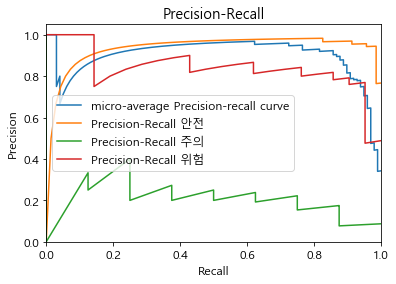

In [15]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams.update({'font.size': 12})
plot.precision_recall(y_test, logi.predict_proba(X_test))
plt.legend(['micro-average Precision-recall curve','Precision-Recall 안전','Precision-Recall 주의','Precision-Recall 위험'],loc='center left')

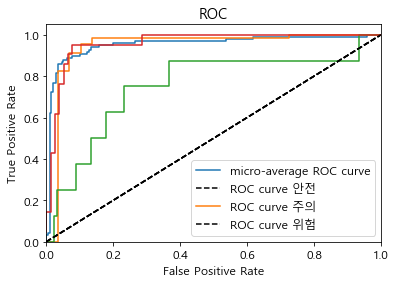

In [16]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams.update({'font.size': 12})
plot.roc(y_test, logi.predict_proba(X_test))
# plt.legend(['micro-average ROC curve','ROC 안전','ROC 주의','ROC 위험'],loc='lower right')
plt.legend(['micro-average ROC curve','ROC curve 안전','ROC curve 주의','ROC curve 위험'])

# plt.legend()
plt.show()

## Assemble(앙상블)

bagging

In [126]:
bag = BaggingClassifier(LogisticRegression(), n_estimators=30, bootstrap=True, n_jobs=-1,oob_score=True)

In [127]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=30, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [128]:
bag.score(X_test,y_test)

0.8571428571428571

In [53]:
app = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)
    bag.fit(X_train,y_train)
    app.append(bag.score(X_test,y_test))
sum(app)/len(app)

NameError: name 'bag' is not defined

(0.7, 1.0)

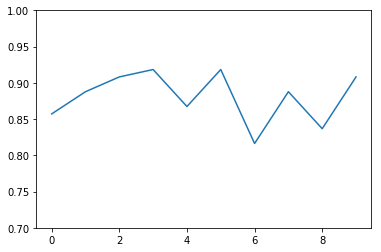

In [130]:
plt.plot(range(10), app, label="training accuracy")
plt.ylim(0.7,1.)

In [131]:
cross_val_score(bag, ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],cv=10).mean()

0.8860516934046345

In [132]:
train_size, train_score, test_score = learning_curve(bag, X_train, y_train, cv=10)
# train_score, test_score = validation_curve(logi, X_train, y_train, cv=10, param_name='n_neighbors', param_range=range(1,5))

KeyboardInterrupt: 

In [ ]:
plot.learning_curve(train_score, test_score,train_sizes=np.linspace(0, 300, 5))

In [ ]:
plot.confusion_matrix(y_test, bag.predict(X_test))

In [ ]:
print(classification_report(y_test, bag.predict(X_test), target_names=['안전','주의','위험']))

In [ ]:
plot.precision_recall(y_test, bag.predict_proba(X_test))

In [ ]:
plot.roc(y_test, bag.predict_proba(X_test))

RandomForest

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
rf.score(X_test,y_test)

0.9285714285714286

In [139]:
app = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)
    rf.fit(X_train,y_train)
    app.append(rf.score(X_test,y_test))
sum(app)/len(app)

0.8785714285714284

In [140]:
cross_val_score(rf, ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],cv=10).mean()

0.8620710784313725

In [61]:
ddaa2.columns

Index(['경찰서', '숙박업소', '공사진행현황', 'CCTV', '어린이 놀이시설', '아동안전지킴이집', '어린이보호구역',
       '초유어', '유흥단란', '교통사고'],
      dtype='object')

In [81]:
rf.feature_importances_

array([0.04, 0.01, 0.12, 0.19, 0.14, 0.14, 0.27, 0.05, 0.04])

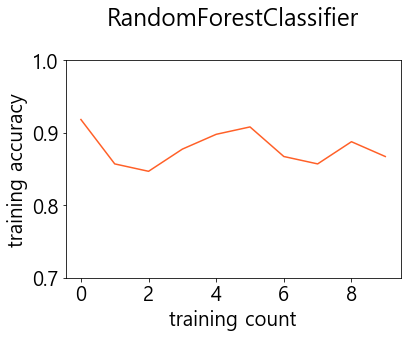

In [146]:
plt.rcParams.update({'font.size': 20})
plt.plot(range(10), app, label="training accuracy",color='#FF6028')
# plt.scatter(range(10), app, label="training accuracy",color='#FF6028')
plt.xlabel("training count")
plt.ylabel("training accuracy")
plt.title('RandomForestClassifier\n')
plt.ylim(0.7,1.)
plt.show()

In [147]:
train_size, train_score, test_score = learning_curve(rf, X_train, y_train, cv=10)
# train_score, test_score = validation_curve(logi, X_train, y_train, cv=10, param_name='n_neighbors', param_range=range(1,5))

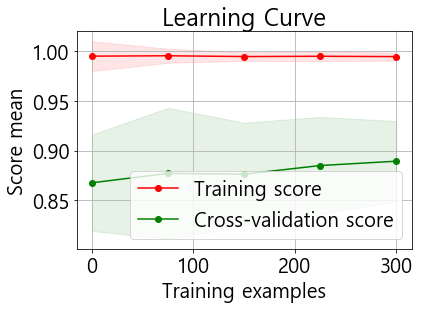

In [148]:
plot.learning_curve(train_score, test_score,train_sizes=np.linspace(0, 300, 5))

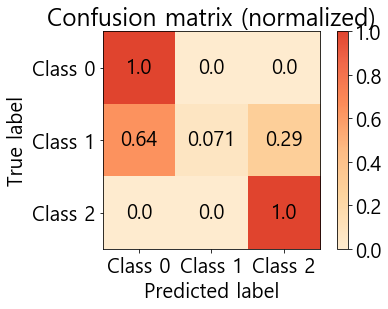

In [149]:
plot.confusion_matrix(y_test, rf.predict(X_test),normalize=True)

In [150]:
print(classification_report(y_test, rf.predict(X_test), target_names=['안전','주의','위험']))

             precision    recall  f1-score   support

         안전       0.87      1.00      0.93        62
         주의       1.00      0.07      0.13        14
         위험       0.85      1.00      0.92        22

avg / total       0.89      0.87      0.81        98



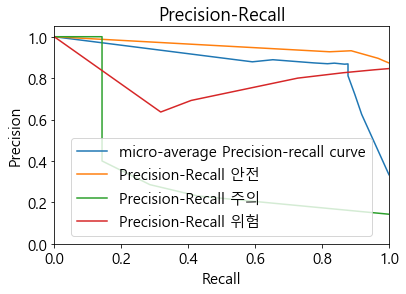

In [161]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams.update({'font.size':15} )
plot.precision_recall(y_test, rf.predict_proba(X_test))
plt.legend(['micro-average Precision-recall curve','Precision-Recall 안전','Precision-Recall 주의','Precision-Recall 위험'],loc='lower center')

precision, recall(정밀도와 재현율)이 오른쪽 위로 가서 균형을 이루어야하는데
'주의'의 경우 

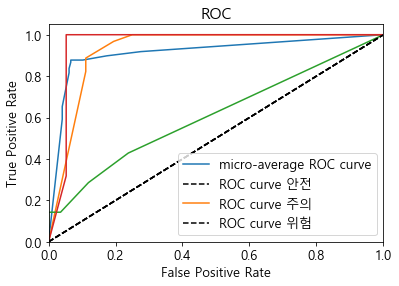

In [163]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams.update({'font.size':13} )
plot.roc(y_test, rf.predict_proba(X_test))
# plt.legend(['micro-average ROC curve','ROC 안전','ROC 주의','ROC 위험'],loc='lower right')
plt.legend(['micro-average ROC curve','ROC curve 안전','ROC curve 주의','ROC curve 위험'])
# plt.legend()
plt.show()

ert

In [109]:
ert = ExtraTreesClassifier()

In [112]:
ert.fit(X_train,y_train)

24.5 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [111]:
ert.score(X_test,y_test)

0.8979591836734694

In [163]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5)

In [167]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [168]:
abc.score(X_test,y_test)

0.7653061224489796

In [169]:
cross_val_scores_check(abc,ddaa2)

0.7782586898395721

### GBM

In [8]:
from sklearn.model_selection import train_test_split

In [21]:
gbc = GradientBoostingClassifier()

In [22]:
app = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)
    gbc.fit(X_train,y_train)
    app.append(gbc.score(X_test,y_test))
sum(app)/len(app)

0.8581632653061224

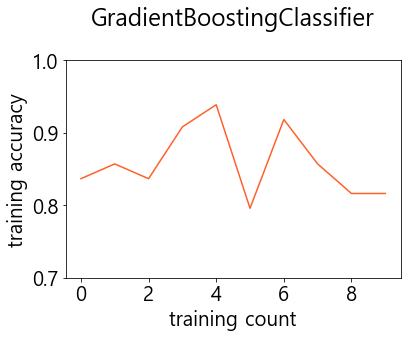

In [23]:
plt.rcParams.update({'font.size': 20})
plt.plot(range(10), app, label="training accuracy",color='#FF6028')
# plt.scatter(range(10), app, label="training accuracy",color='#FF6028')
plt.xlabel("training count")
plt.ylabel("training accuracy")
plt.title('GradientBoostingClassifier\n')
plt.ylim(0.7,1.)
plt.show()

In [24]:
cross_val_score(gbc, ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],cv=10).mean()

0.8467245989304812

In [25]:
train_size, train_score, test_score = learning_curve(gbc, X_train, y_train, cv=10)
# train_score, test_score = validation_curve(logi, X_train, y_train, cv=10, param_name='n_neighbors', param_range=range(1,5))

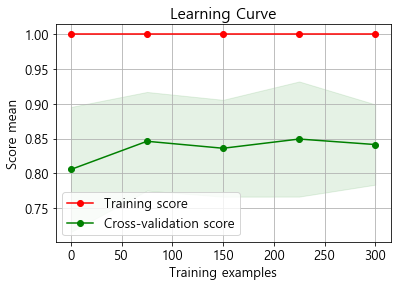

In [26]:
plt.rcParams.update({'font.size': 13})
plot.learning_curve(train_score, test_score,train_sizes=np.linspace(0, 300, 5))

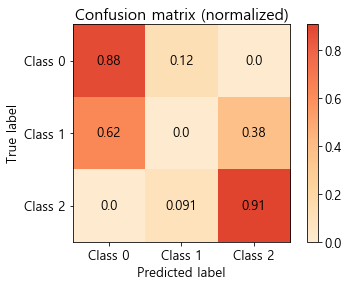

In [27]:
plot.confusion_matrix(y_test, gbc.predict(X_test),normalize=True)

In [31]:
print(classification_report(y_test, gbc.predict(X_test), target_names=['안전','주의','위험']))

             precision    recall  f1-score   support

         안전       0.92      0.88      0.90        68
         주의       0.00      0.00      0.00         8
         위험       0.87      0.91      0.89        22

avg / total       0.84      0.82      0.83        98



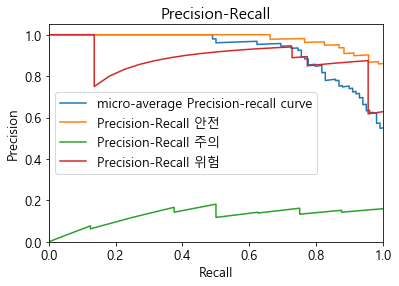

In [32]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plot.precision_recall(y_test, gbc.predict_proba(X_test))
plt.legend(['micro-average Precision-recall curve','Precision-Recall 안전','Precision-Recall 주의','Precision-Recall 위험'],loc='center left')

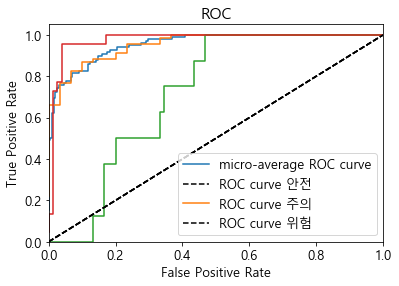

In [33]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plot.roc(y_test, gbc.predict_proba(X_test))
# plt.legend(['micro-average ROC curve','ROC 안전','ROC 주의','ROC 위험'],loc='lower right')
plt.legend(['micro-average ROC curve','ROC curve 안전','ROC curve 주의','ROC curve 위험'])
# plt.legend()
plt.show()

# 모델 검정

In [13]:
def cross_val_scores_check(model,data):
    a = list(cross_val_score(model,data.iloc[:,:-1],data.iloc[:,-1],cv=10))
    return sum(a)/len(a)

In [16]:
# cross-validation
from sklearn.model_selection import cross_val_score

In [157]:
cross_val_scores_check(bag,ddaa2)

0.8860516934046345

In [156]:
cross_val_scores_check(logi,ddaa2)

0.8829266934046345

In [155]:
cross_val_scores_check(rf,ddaa2)

0.8589516488413548

In [154]:
cross_val_scores_check(dtc,ddaa2)

0.8097927807486631

### cross_val_predict
오차 행렬 (confusion matrix)

In [ ]:
# sequence = polygon_measure.sort_values('면적')
sequence = ddaa1.sort_values('교통사고')
t = sequence['교통사고']
tt = list(range(len(polygon_measure)))
ah = pd.DataFrame(t)
ah.reset_index(inplace=True)
ah.drop(columns='index',inplace=True)
ah.reset_index(inplace=True)
ah['교통사고']

In [123]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
logi.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
from sklearn_evaluation import plot

In [133]:
ert.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

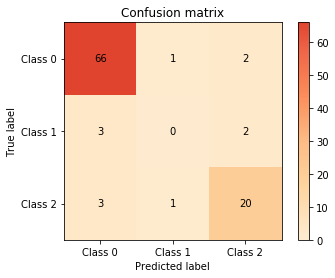

In [181]:
plot.confusion_matrix(y_test, logi.predict(X_test))

### data가 unblanced 해서 Class1(주의)에 대한 정확한 판정이 되지 않는다)

In [146]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    X_train, X_test, y_train, y_test = train_test_split(ddaa2.iloc[:,:-1],ddaa2.iloc[:,-1],test_size=0.3)
    ert.fit(X_train, y_train)
    training_accuracy.append(ert.score(X_train, y_train))
    test_accuracy.append(ert.score(X_test, y_test))

(0.7, 1.0)

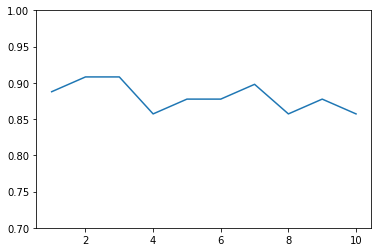

In [149]:
plt.plot(neighbors_settings, test_accuracy, label="training accuracy")
plt.ylim(0.7,1.)

# Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()